<a href="https://colab.research.google.com/github/ncorriveau/transformers_for_prediction/blob/main/data_preprocesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Table Extraction

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Connect to the database
def extract_tables(table_list=None):
    conn = sqlite3.connect('database.sqlite')
    c = conn.cursor()
    c.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = c.fetchall()
    df_dict = dict()

    for table in tables:
        df_name = f"df_{table[0]}"
        #print(df_name)
        if table_list:
            if df_name in table_list:
                print(f"Extracting table: {table[0]}")
                df_dict.update({df_name:pd.read_sql_query(f"SELECT * from {table[0]}", conn)})
        else:
            print('no table list')
            df_dict.update({df_name: pd.read_sql_query(f"SELECT * from {table[0]}", conn)})
            
    conn.close()

    return df_dict

df_dict = extract_tables(table_list=['df_Player_Attributes', 'df_Match'])

Extracting table: Player_Attributes
Extracting table: Match


##Data Exploration

In [ ]:
df_dict['df_Player_Attributes'].columns


Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

Text(0.5, 0, 'Overall Rating')

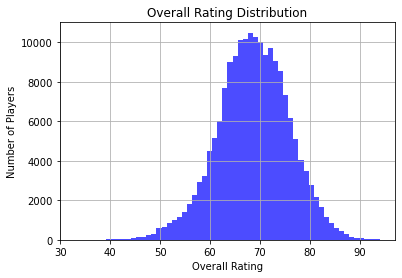

In [ ]:
#visualization 
df_players = df_dict['df_Player_Attributes']
fig = df_players['overall_rating'].hist(bins=60, color='blue', alpha=0.7)
fig.set_title('Overall Rating Distribution')
fig.set_ylabel('Number of Players')
fig.set_xlabel('Overall Rating')

Text(0.5, 0, 'Number of Ratings')

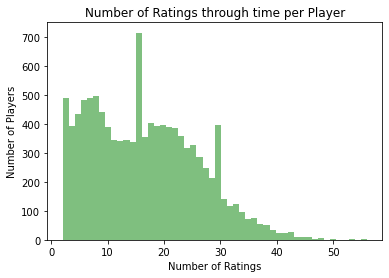

In [ ]:
fig, ax = plt.subplots() 
ax.hist(df_players['player_api_id'].value_counts(), bins=50, color='green', alpha=0.5)
ax.set_title('Number of Ratings through time per Player')
ax.set_ylabel('Number of Players')
ax.set_xlabel('Number of Ratings')


In [ ]:
print(f"min date: {df_players['date'].min()}")
print(f"max date: {df_players['date'].max()}")

min date: 2007-02-22 00:00:00
max date: 2016-07-07 00:00:00


Text(0.5, 0, 'Attacking Work Rate Labels')

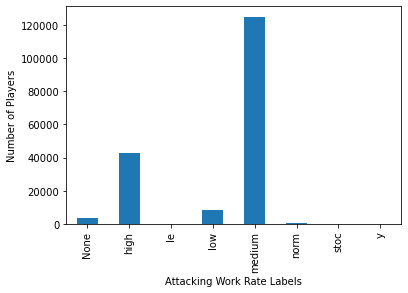

In [ ]:
df = df_players.groupby(['attacking_work_rate']).size()
ax = df.plot(kind='bar')
ax.set_ylabel('Number of Players')
ax.set_xlabel('Attacking Work Rate Labels')

In [ ]:
pd.set_option('display.max_columns', None)
df_dict['df_Match'].head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [ ]:
df_match = df_dict['df_Match']
home_wins = len(df_match[df_match['home_team_goal'] > df_match['away_team_goal']])
home_losses = len(df_match[df_match['home_team_goal'] < df_match['away_team_goal']])
home_ties = len(df_match[df_match['home_team_goal'] == df_match['away_team_goal']])
total = home_wins + home_losses + home_ties
print(f"Home Wins: {((home_wins/total)* 100):.2f}%")
print(f"Home Losses : {((home_losses/total)* 100):.2f}%")
print(f"Home Wins: {((home_ties/total)* 100):.2f}%")

Home Wins: 45.87%
Home Losses : 28.74%
Home Wins: 25.39%


In [ ]:
print(f"min date: {df_match['date'].min()}")
print(f"max date: {df_match['date'].max()}")

min date: 2008-07-18 00:00:00
max date: 2016-05-25 00:00:00


In [ ]:
df_match['possession'].isna().sum()/len(df_match)

0.4527502983178721

##Data Cleanup

In [ ]:
def clean_up_players_df(df_dict):
    '''make necessary changes to the player attributes dataframe for further processing and analysis'''
    df_players_attributes = df_dict['df_Player_Attributes']
    #convert to datetime object
    df_players_attributes['date'] = pd.to_datetime(df_players_attributes['date'])

    #add dummy variables for categorical columns
    for col in df_players_attributes.columns:
        if len(df_players_attributes[col].unique()) < 25:
            df_players_attributes = pd.concat([df_players_attributes, pd.get_dummies(df_players_attributes[col], prefix=col)], axis=1)
            df_players_attributes.drop(col, axis=1, inplace=True)
    
    #get all float64 columns and convert fill na's with the mean
    float_cols = df_players_attributes.select_dtypes(include=['float64']).columns.to_list()
    for col in float_cols:
        col_mean = df_players_attributes[col].mean()
        df_players_attributes[col].fillna(col_mean, inplace=True)


    #drop duplicates of player id and date keeping first occurence 
    df_players_attributes.drop_duplicates(subset=['player_api_id', 'date'], inplace=True)

    return df_players_attributes

df_players_attributes = clean_up_players_df(df_dict)


In [ ]:
df_players_attributes.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 68 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   id                          183142 non-null  int64         
 1   player_fifa_api_id          183142 non-null  int64         
 2   player_api_id               183142 non-null  int64         
 3   date                        183142 non-null  datetime64[ns]
 4   overall_rating              183142 non-null  float64       
 5   potential                   183142 non-null  float64       
 6   crossing                    183142 non-null  float64       
 7   finishing                   183142 non-null  float64       
 8   heading_accuracy            183142 non-null  float64       
 9   short_passing               183142 non-null  float64       
 10  volleys                     183142 non-null  float64       
 11  dribbling                   183142 non-

/var/folders/2j/t3pflg8s6gz_8_37kf_zrjqh0000gn/T/ipykernel_52759/2193221915.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_players_attributes.info(verbose=True, null_counts=True)


In [ ]:
df_players_attributes_copy = df_players_attributes.copy()
print(f"Shape before dropping na rows {df_players_attributes_copy.shape}")

df_players_attributes_copy.dropna(axis=0, inplace=True)
print(f"Shape after dropping na rows {df_players_attributes_copy.shape}")

Shape before dropping na rows (183142, 68)
Shape after dropping na rows (183142, 68)


In [ ]:
def clean_up_matches_df(df_dict):
    '''make necessary adjustments to the matches dataframe for further processing and analysis such as dropping empty columns or rows, and adding in a column for home team result
    Note that home_player_1	etc are player ids for the given teams and can be used to join with the player attributes dataframe'''

    df_matches = df_dict['df_Match']

    #convert date to datetime object
    df_matches['date'] = pd.to_datetime(df_matches['date'])

    total = df_matches.shape[0]
    for col in df_matches.columns:
        #drop columns with greater than 10% missing values
        if df_matches[col].isnull().sum()/total > 0.1:
            df_matches.drop(col, axis=1, inplace=True)
        elif col in ['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession','country_id', 'league_id','stage','season']:
            df_matches.drop(col, axis=1, inplace=True)
        
    #drop rows with missing values
    df_matches.dropna(axis=0, inplace=True)

    #add column for home team win, draw, away team win
    df_matches['home_win'] = np.where(df_matches['home_team_goal'] > df_matches['away_team_goal'], 1, 0)
    df_matches['home_draw'] = np.where(df_matches['home_team_goal'] == df_matches['away_team_goal'], 1, 0)
    df_matches['home_loss'] = np.where(df_matches['home_team_goal'] < df_matches['away_team_goal'], 1, 0)

    
    return df_matches


df_matches = clean_up_matches_df(df_dict)
print(df_matches.shape)
df_matches.head()

(21361, 76)


,id,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,...,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,home_win,home_draw,home_loss
145,146,2009-02-27,493017,8203,9987,2,1,1.0,2.0,4.0,...,148314.0,37202.0,43158.0,9307.0,42153.0,32690.0,38782.0,1,0,0
153,154,2009-03-08,493025,9984,8342,1,3,1.0,2.0,4.0,...,38366.0,37983.0,39578.0,38336.0,52280.0,27423.0,38440.0,0,0,1
155,156,2009-03-07,493027,8635,10000,2,0,1.0,2.0,4.0,...,94030.0,37893.0,37981.0,131531.0,130027.0,38231.0,131530.0,1,0,0
162,163,2009-03-13,493034,8203,8635,2,1,1.0,2.0,4.0,...,164694.0,30949.0,38378.0,38383.0,38393.0,38253.0,37069.0,1,0,0
168,169,2009-03-14,493040,10000,9999,0,0,1.0,2.0,4.0,...,94284.0,45832.0,26669.0,33671.0,163670.0,37945.0,33622.0,0,1,0


In [ ]:
def create_player_dict(df_players_attributes, player_api_id):
    '''takes the players attributes dataframe and returns a dict of dicts that includes {player id : {date: feature vector}}
    df_players_attribute will be in form: 
        <class 'pandas.core.frame.DataFrame'>
        RangeIndex: 183978 entries, 0 to 183977
        Data columns (total 68 columns):
        #   Column                      Non-Null Count   Dtype         
        ---  ------                      --------------   -----         
        0   id                          183978 non-null  int64         
        1   player_fifa_api_id          183978 non-null  int64         
        2   player_api_id               183978 non-null  int64         
        3   date                        183978 non-null  datetime64[ns]
        4   overall_rating              183142 non-null  float64       
        5   potential                   183142 non-null  float64       
        6   crossing                    183142 non-null  float64       
        7   finishing                   183142 non-null  float64       
        8   heading_accuracy            183142 non-null  float64       
        9   short_passing               183142 non-null  float64       
        10  volleys                     181265 non-null  float64       
        11  dribbling                   183142 non-null  float64       
        12  curve                       181265 non-null  float64       
        13  free_kick_accuracy          183142 non-null  float64       
        14  long_passing                183142 non-null  float64       
        15  ball_control                183142 non-null  float64       
        16  acceleration                183142 non-null  float64       
        17  sprint_speed                183142 non-null  float64       
        18  agility                     181265 non-null  float64       
        19  reactions                   183142 non-null  float64       
        ...
        66  defensive_work_rate_ormal   183978 non-null  uint8         
        67  defensive_work_rate_tocky   183978 non-null  uint8      
        
        where each column after date is a feature of that particular player on that particular date'''
    
    player_dict = dict()
    df_player = df_players_attributes[df_players_attributes['player_api_id'] == player_api_id].drop(['id', 'player_fifa_api_id', 'player_api_id'], axis=1)
    player_dates = df_player['date'].unique()

    if df_player.index.name != 'date':
        df_player = df_player.set_index(['date'])

    for date in player_dates:
        player_dict.update({date: df_player.loc[date].to_list()})
    
    return player_dict

def get_match_players(df_match, match_api_id):
    '''takes match_df and a match_id and returns a dict of {col: player_api_id} of the players in the match'''

    df_match = df_match[df_match['match_api_id'] == match_api_id]
    #col_names = ['home_player_'+'i' for i in range(1,12)] + ['away_player_'+'i' for i in range(1,12)]
    df_match = df_match.astype(int)
    return df_match.iloc[0]['home_player_1':'away_player_11'].to_dict()

def get_match_players_position(df_match, match_api_id):
    '''takes match_df and a match_id and returns a dict of {col: player_api_id} of the players in the match'''
    player_pos_dict = {} 
    df_match = df_match[df_match['match_api_id'] == match_api_id]

    #create dict of dict[player_id] = (x_position, y_position)
    for i in range(1,12):

        player_pos_dict[df_match.iloc[0]['home_player_'+str(i)].astype(int)] = i
        player_pos_dict[df_match.iloc[0]['away_player_'+str(i)].astype(int)] = i

        # player_pos_dict[df_match.iloc[0]['home_player_'+str(i)].astype(int)] = (df_match.iloc[0]['home_player_X'+str(i)].astype(int), df_match.iloc[0]['home_player_Y'+str(i)].astype(int))
        # player_pos_dict[df_match.iloc[0]['away_player_'+str(i)].astype(int)] = (df_match.iloc[0]['away_player_X'+str(i)].astype(int), df_match.iloc[0]['away_player_Y'+str(i)].astype(int))

    return player_pos_dict

def get_most_recents_stats(df_match, match_api_id, player_dict):
    '''given a match_df, match id, and player_dict as returned by create_player_dict(), return thee feature vector of the most recent stats of that player
    keys of player_dict and dates in dataframe are both date time objects '''
    import numpy as np
    from datetime import datetime, timedelta

    df_match = df_match[df_match['match_api_id'] == match_api_id]
    match_date = df_match['date'].iloc[0]
    most_recent_date = 0
    abs =  np.inf
    #get the players in the match
   
    for date in player_dict.keys():
        date_diff = match_date - date
        if np.absolute(date_diff.days) < abs:
            abs = np.absolute(date_diff.days)
            most_recent_date = date
    
    return player_dict[most_recent_date]



In [ ]:
for i, (label,id) in enumerate(get_match_players(df_matches, 493017).items()):
    print(i, label, id)

0 home_player_1 38327
1 home_player_2 67950
2 home_player_3 67958
3 home_player_4 67959
4 home_player_5 37112
5 home_player_6 36393
6 home_player_7 148286
7 home_player_8 67898
8 home_player_9 164352
9 home_player_10 38801
10 home_player_11 26502
11 away_player_1 37937
12 away_player_2 38293
13 away_player_3 148313
14 away_player_4 104411
15 away_player_5 148314
16 away_player_6 37202
17 away_player_7 43158
18 away_player_8 9307
19 away_player_9 42153
20 away_player_10 32690
21 away_player_11 38782


In [ ]:
get_match_players_position(df_matches, 493017)

{38327: 1,
 37937: 1,
 67950: 2,
 38293: 2,
 67958: 3,
 148313: 3,
 67959: 4,
 104411: 4,
 37112: 5,
 148314: 5,
 36393: 6,
 37202: 6,
 148286: 7,
 43158: 7,
 67898: 8,
 9307: 8,
 164352: 9,
 42153: 9,
 38801: 10,
 32690: 10,
 26502: 11,
 38782: 11}

In [ ]:
df_matches.shape
df_matches.head()

,id,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,...,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,home_win,home_draw,home_loss
145,146,2009-02-27,493017,8203,9987,2,1,1.0,2.0,4.0,...,148314.0,37202.0,43158.0,9307.0,42153.0,32690.0,38782.0,1,0,0
153,154,2009-03-08,493025,9984,8342,1,3,1.0,2.0,4.0,...,38366.0,37983.0,39578.0,38336.0,52280.0,27423.0,38440.0,0,0,1
155,156,2009-03-07,493027,8635,10000,2,0,1.0,2.0,4.0,...,94030.0,37893.0,37981.0,131531.0,130027.0,38231.0,131530.0,1,0,0
162,163,2009-03-13,493034,8203,8635,2,1,1.0,2.0,4.0,...,164694.0,30949.0,38378.0,38383.0,38393.0,38253.0,37069.0,1,0,0
168,169,2009-03-14,493040,10000,9999,0,0,1.0,2.0,4.0,...,94284.0,45832.0,26669.0,33671.0,163670.0,37945.0,33622.0,0,1,0


In [ ]:
def create_tensors(df_matches, df_players_attributes, add_pos = False, add_team = False):
    '''take our match dataframe, and create a numpy tensor that is of shape (num_matches, 23, 66) where the first dimension is the match, the second dimension is the player from that match, 
        and the third dimension is the feature vector that will contain all the features in our player_attributes data set, plus the position of the player in the match and an indicator whether they were home or away'''
    import numpy as np
    features  = 64 + add_pos + add_team
    token_matrix = np.zeros((df_matches.shape[0], 22, features))
    result_matrix = np.zeros((df_matches.shape[0], 3))
    df_matches_copy = df_matches.copy()

    for i in range(df_matches.shape[0]):
        match_id = df_matches_copy.iloc[i]['match_api_id']
        player_pos_dict = get_match_players_position(df_matches_copy, match_id)
        match_players = get_match_players(df_matches_copy, match_id)
        for idx, (label, id) in enumerate(match_players.items()):
            attribute_dict = create_player_dict(df_players_attributes,id)
            most_recent_stats = get_most_recents_stats(df_matches_copy, match_id, attribute_dict)

            if add_pos:
                most_recent_stats.append(player_pos_dict[id])
            if add_team:
                if label.startswith('home'):
                    most_recent_stats.append(1)
                else:
                    most_recent_stats.append(0)
            #print(label, len(most_recent_stats))
            token_matrix[i][idx] = most_recent_stats
        result_matrix[i] = df_matches_copy.iloc[i]["home_win":"home_loss"].to_numpy()
    return token_matrix, result_matrix
        

In [ ]:
features, labels = create_tensors(df_matches, df_players_attributes, add_pos=True, add_team=True)